In [ ]:
pip install fer

In [ ]:
pip install tensorflow>=1.7 opencv-contrib-python==3.3.0.9

In [109]:
from google.colab import files

uploaded = files.upload()

Saving happy_girl.jpg to happy_girl (5).jpg


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[{'box': (252, 299, 595, 595), 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.98, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.02}}]
0.98


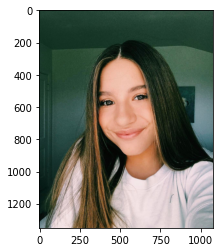

In [121]:
import base64
from fer import FER
import matplotlib.pyplot as plt

# Returns the emotion and score of the input filename
# against the encoded_string as a tuple.
#
# Input:
#   encoded_string: Base64 encoded string of the image contents.
#   filename: The uploaded image file.  
# Return:
#  A tuple of emotion and score.
def wrapper(encoded_string, filename):
  with open(filename, "wb") as f:
    f.write(base64.b64decode(encoded_string))
    
    img = plt.imread(filename)
    predictor = FER(mtcnn=True)
    print(predictor.detect_emotions(img))
    plt.imshow(img)
    
    emotion, score = predictor.top_emotion(img)
  f.close()
  return (emotion, score)

# Test the method.
with open("happy_girl.jpg", "rb") as img_file:
  _, score = wrapper(base64.b64encode(img_file.read()), 'ouput.jpg')
img_file.close()
print(score)